In [8]:
#!/usr/bin/env python
import msgpack

filepath= "artifacts/2024-04-21--13-23/results/msgpack.msgpack"

# Load from a file
try:
    with open(filepath, 'rb') as file:
        loaded_data = msgpack.unpackb(file.read(), use_list=True, raw=False, strict_map_key=False)
    #print(loaded_data)
except ValueError as e:
    print(f"ValueError: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


C:\Users\nick2\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [19]:
from RaTrack.main_utils import save_json_list_to_csv

# Prepare the flow metrics data
flow_met_json = [
    {'rne': 0.14783121245525485, '50-50 rne': "nan", 'mov_rne': 0.0, 'stat_rne': "nan", 'sas': 0.9972190566936564, 'ras': 0.9998003503232739, 'epe': 0.3485774119628494},
    {'rne': 0.15120055208713695, '50-50 rne': "nan", 'mov_rne': 0.007212005458617368, 'stat_rne': "nan", 'sas': 0.9983191274996109, 'ras': 0.9999763602836585, 'epe': 0.35644170240646805}
]

# Prepare the segmentation metrics data
seg_met_json = [
    {'acc': 0.6852517540622595, 'miou': 0.3799232796199921, 'sen': 0.7869268018118742},
    {'acc': 0.9123090676880734, 'miou': 0.5136984181546864, 'sen': 0.4455232851816174}
]

# Save flow metrics to CSV
save_json_list_to_csv(flow_met_json, "./flow-metrics.csv")

# Save segmentation metrics to CSV
save_json_list_to_csv(seg_met_json, "./segmentation-metrics.csv")


   stat_rne                 sas               mov_rne  50-50 rne  \
0       NaN         0.997219057                     0        NaN   
1       NaN         0.998319127           0.007212005        NaN   
2  stat_rne                 sas               mov_rne  50-50 rne   
3       NaN  0.9972190566936564                   0.0        NaN   
4       NaN  0.9983191274996109  0.007212005458617368        NaN   

                  ras                  rne                  epe  
0          0.99980035          0.147831212          0.348577412  
1          0.99997636          0.151200552          0.356441702  
2                 ras                  rne                  epe  
3  0.9998003503232739  0.14783121245525485   0.3485774119628494  
4  0.9999763602836585  0.15120055208713695  0.35644170240646805  


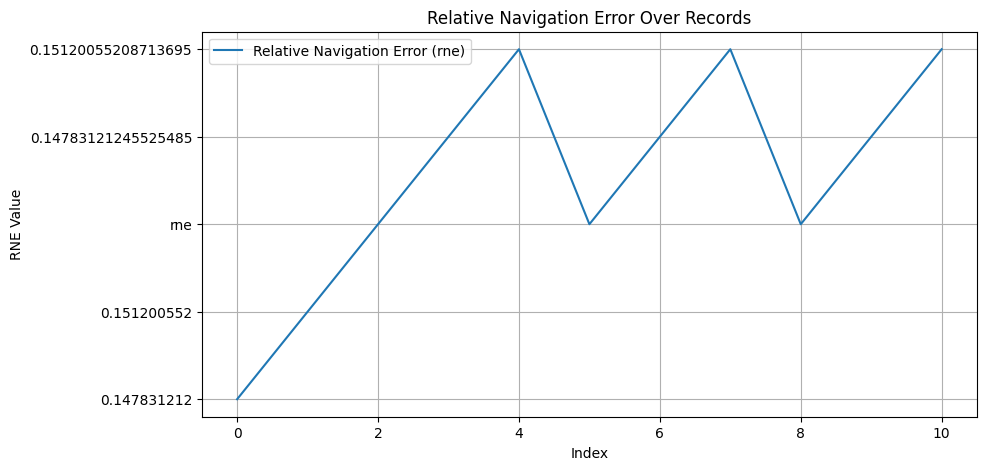

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
data = pd.read_csv("flow-metrics.csv")

# Display the DataFrame to understand its structure
print(data.head())

# Example of plotting 'rne' metric over the index
plt.figure(figsize=(10, 5))
plt.plot(data['rne'], label='Relative Navigation Error (rne)')
plt.title('Relative Navigation Error Over Records')
plt.xlabel('Index')
plt.ylabel('RNE Value')
plt.legend()
plt.grid(True)
plt.show()

# If you have a 'time' or 'date' column, you can set it as the index for more meaningful plots:
# data['time'] = pd.to_datetime(data['time'])  # Converting to datetime if not already
# data.set_index('time', inplace=True)

# Then plotting:
# plt.figure(figsize=(10, 5))
# plt.plot(data['rne'], label='Relative Navigation Error (rne)')
# plt.title('RNE Over Time')
# plt.xlabel('Time')
# plt.ylabel('RNE Value')
# plt.legend()
# plt.grid(True)
# plt.show()
